In [1]:
import numpy as np

## 初期化


K = 20
M = 15
N = 1500
q = 3

In [2]:
K=20
M=50
N=1500
q=3

In [3]:
H = np.random.ranf(K*M).reshape(K,M) # R(KxM)

In [4]:
def create_sparse(M, N, k):
    elem = np.random.ranf(k*N).reshape(k,N)
    zeros = (np.zeros((M-k)*N).reshape((M-k),N))
    X = np.concatenate((elem, zeros), axis=0)
    X = [np.random.permutation(x) for x in np.transpose(X)]
    return np.transpose(X)


In [5]:
U = create_sparse(M,N,q)

In [6]:
Y = np.dot(H, U)

### サイズを確かめる

In [7]:
np.shape(Y),np.shape(H),np.shape(U)

((20, 1500), (20, 50), (50, 1500))

## NMFのコード

In [8]:
def NMF(Y, trueDic, M, alpha=0):
    
    def initialize(): 
        H = Y[:,:M]
        U = np.random.ranf(M*N).reshape(M,N)        
        return H, U
    
    def update(Y, H, U):
        H = H*((np.dot(Y, np.transpose(U)))/(np.dot(H,(np.dot(U,np.transpose(U))))))
        U = U*((np.dot(np.transpose(H), Y)-alpha)/(np.dot(np.dot(np.transpose(H), H),U)))
        return H, U
        
    def evaluate(Y, H, U, trueDic):
        def count_atom(estDic, trueDic):
            num_recoved = 0;
            totaldist = 0
            Tatoms = np.zeros(len(trueDic))  # True atoms
            Eatoms = np.zeros(len(trueDic))  # Estimated atoms

            num_atoms = len(trueDic[0])
    
            for i in range(0,num_atoms):
                Tatom = trueDic[:,i]# True atoms
                distances = [sum(pow(Tatom-h,2)) for h in np.transpose(H)]
                mindis = min(distances)
                minidx = np.argmin(distances)
        
                Eatom = estDic[:,minidx];
                error = 1-abs(np.dot(np.transpose(Eatom), Tatom));
                totaldist = totaldist+error
                num_recoved = num_recoved+(error<0.01)
        
            Tatoms = np.vstack((Tatoms, Tatom));
            Eatoms = np.vstack((Eatoms, Eatom));    
            return 100*(num_recoved/num_atoms)
        
        error = sum(sum(pow(Y-np.dot(H,U),2))) # Error distance
        atom = count_atom(H, trueDic)          # Ratio of recoverd atom
        return error, atom    
    
    # initialize
    error = [];
    atom = [];
    H, U = initialize()
    
    # update dictionary and coefficients
    for i in range(0,2000):
        H, U = update(Y,H,U)
        err, atm = evaluate(Y,H,U, trueDic)
        error.append(err)
        atom.append(atm)
        
    return H, U, error, atom

## NMFの実行

In [9]:
a = 1e-3
estH, estU, error, atom =  NMF(Y, H, M,alpha=a)

<AxesSubplot:>

findfont: Font family ['migmix-1p-regular'] not found. Falling back to DejaVu Sans.


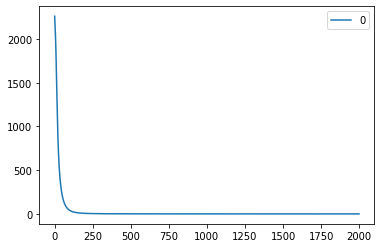

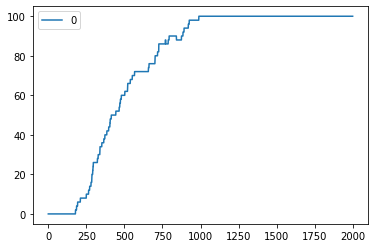

In [10]:
%matplotlib inline
import pandas as pd
error =pd.DataFrame(error)
atom =pd.DataFrame(atom)

error.plot(kind='line')
atom.plot(kind='line')